Make a few of the different 'no global features' models to compare/average them, see how much variation there is. Do the same with the global eta in F model in another notebook! **

In [1]:
#imports
import uproot as ur
import awkward as ak
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "6" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import graph_util as gu
import plot_util as pu

from scipy.interpolate import interp1d

from Week7_PFNutils import *

In [2]:
data_path = '/fast_scratch/atlas_images/v01-45/' 
file = np.load('/fast_scratch/atlas_images/v01-45/nn_splitdata_kd.npz')

In [3]:
X_train = file['arr_0']
X_val = file['arr_1']
X_test = file['arr_2']
Y_train = file['arr_3']
Y_val = file['arr_4']
Y_test = file['arr_5']
eta_test = file['arr_11']

In [4]:
def modelNmetrics_noglob(X_train, X_val, X_test, Y_train, Y_val, Y_test, epochs, batch_size, filename):
    #run the model & create the metrics
    
    Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)
   
    #make the model:
    pfn = PFN(input_dim=X_train.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)#, num_global_features =1)
    
    #try callbacks:
    callback = tf.keras.callbacks.ModelCheckpoint(data_path+filename, save_best_only=True)
    
    # train model
    history = pfn.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=1, callbacks=[callback])
    
    return history


In [ ]:
hist1 = modelNmetrics_noglob(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_1.hdf5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation[0][0]                 
______________________________________________________________________________________________

In [5]:
hist2 = modelNmetrics_noglob(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_2.hdf5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation[0][0]                 
______________________________________________________________________________________________

In [6]:
hist3 = modelNmetrics_noglob(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_3.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_7 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_7[0][0]               
____________________________________________________________________________________________

In [7]:
hist4 = modelNmetrics_noglob(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_4.hdf5')

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_14 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_14[0][0]              
____________________________________________________________________________________________

In [8]:
hist5 = modelNmetrics_noglob(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_5.hdf5')

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_21 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_21[0][0]              
____________________________________________________________________________________________

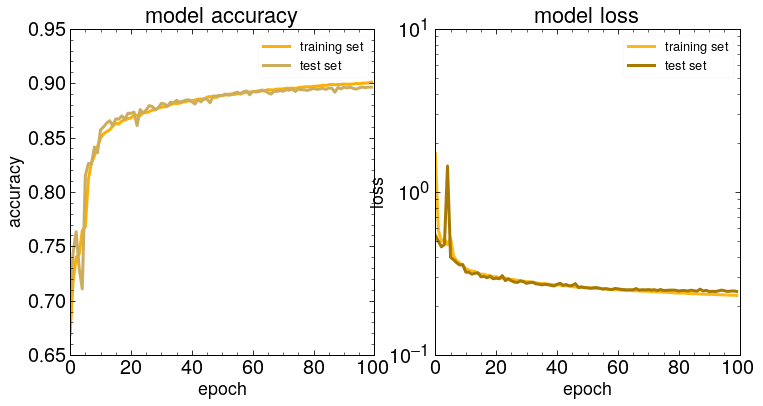

In [13]:
histplots(hist2)

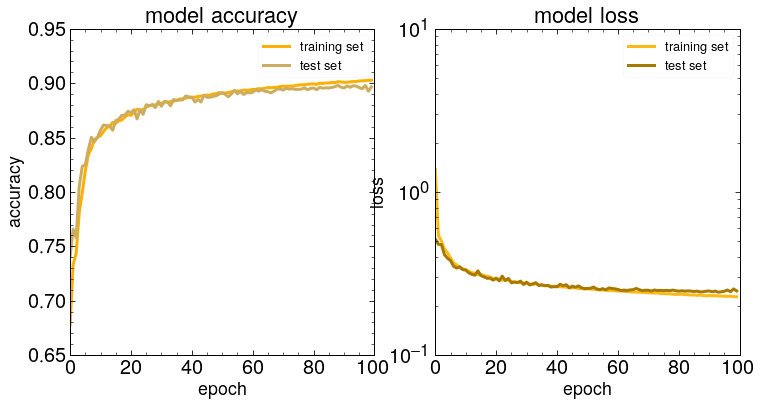

In [14]:
histplots(hist3)

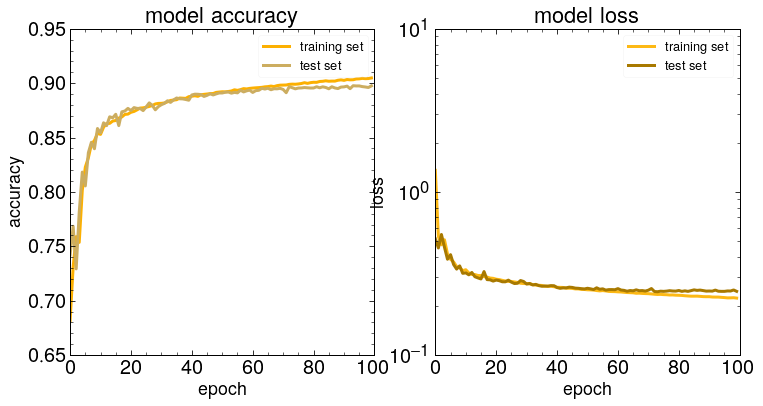

In [16]:
histplots(hist4)

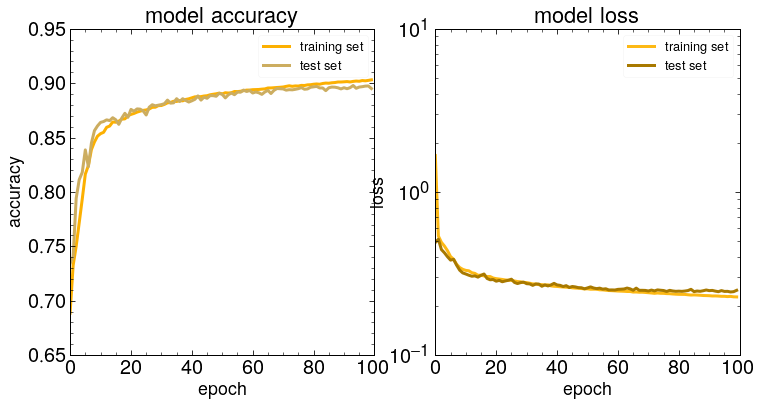

In [17]:
histplots(hist5)

In [5]:
#now make some using a set seed!

def modelNmetrics_noglob_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, epochs, batch_size, filename, seed):
    #run the model & create the metrics
    
    Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)
   
    #make the model:
    pfn = PFN(input_dim=X_train.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes, Phi_k_inits = seed, F_k_inits = seed)#, num_global_features =1)
    
    #try callbacks:
    callback = tf.keras.callbacks.ModelCheckpoint(data_path+filename, save_best_only=True)
    
    # train model
    history = pfn.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=1, callbacks=[callback])
    
    return history


In [8]:
seed = tf.keras.initializers.RandomNormal(mean=0., stddev=np.sqrt(2./100), seed=222222) #Imitating He initialization b/c I think its ReLu
hist_s1 = modelNmetrics_noglob_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_s1.hdf5', seed)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_7 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_7[0][0]               
____________________________________________________________________________________________

In [9]:
hist_s2 = modelNmetrics_noglob_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_s2.hdf5', seed)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_14 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_14[0][0]              
____________________________________________________________________________________________

In [10]:
hist_s3 = modelNmetrics_noglob_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_s3.hdf5', seed)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_21 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_21[0][0]              
____________________________________________________________________________________________

In [11]:
hist_s4 = modelNmetrics_noglob_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_s4.hdf5', seed)

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_28 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_28[0][0]              
____________________________________________________________________________________________

In [12]:
hist_s5 = modelNmetrics_noglob_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w8_pfn_noglob_s5.hdf5', seed)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_35 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_35[0][0]              
____________________________________________________________________________________________

In [6]:
X_glob_tr = file['arr_6']
X_glob_val = file['arr_7']
X_glob_te = file['arr_8']
eta_train = file['arr_9']
eta_val = file['arr_10']
eta_test = file['arr_11'] #actually it should all be from the same file, so load these in to make the global models here too

In [17]:
hist_g1 = GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_1.hdf5', 100)

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_56 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_56[0][0]              
____________________________________________________________________________________________

In [18]:
hist_g2 = GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_2.hdf5', 100)

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_63 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_63[0][0]              
____________________________________________________________________________________________

In [19]:
hist_g3 = GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_3.hdf5', 100)

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_70 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_70[0][0]              
___________________________________________________________________________________________

In [20]:
hist_g4 = GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_4.hdf5', 100)

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_77 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_77[0][0]              
___________________________________________________________________________________________

In [21]:
hist_g5 = GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_5.hdf5', 100)

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_84 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_84[0][0]              
___________________________________________________________________________________________

In [7]:
#then just make a global one with a seed too:
def GlobalModel_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, epochs, batch_size, num_glob, filename, fsize, seed):
    #for now, try all three global features in X_glob okay?! 
    #one function to run the model & create the metrics
    
    Phi_sizes, F_sizes = (100, 100, 128), (fsize, fsize, fsize) #F affects the global features, so try increasing?
    # F initially was (100,100,100)
   
    #concatenate the Xs (needed for global features):
    X_tr = [X_train, X_glob_tr] #will this work?
    X_vali = [X_val, X_glob_val]
    X_te = [X_test, X_glob_te]
    
    #make the model:
    pfn = PFN(input_dim=X_train.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes, num_global_features=num_glob, Phi_k_inits=seed, F_k_inits=seed)
    
    #try callbacks:
    callback = tf.keras.callbacks.ModelCheckpoint(data_path+filename, save_best_only=True)
    
    # train model
    history = pfn.fit(X_tr, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_vali, Y_val), verbose=1, callbacks=[callback])
   
    return history

In [22]:
hist_gs1 = GlobalModel_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_s1.hdf5', 100, seed)

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_91 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_91[0][0]              
___________________________________________________________________________________________

In [23]:
hist_gs2 = GlobalModel_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_s2.hdf5', 100, seed)

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_98 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_98[0][0]              
___________________________________________________________________________________________

In [9]:
seed = tf.keras.initializers.RandomNormal(mean=0., stddev=np.sqrt(2./100), seed=222222)

In [10]:
hist_gs3 = GlobalModel_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_s3.hdf5', 100, seed)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation[0][0]                 
______________________________________________________________________________________________

In [11]:
hist_gs4 = GlobalModel_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_s4.hdf5', 100, seed)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_7 (Activation)       (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_7[0][0]               
____________________________________________________________________________________________

In [12]:
hist_gs5 = GlobalModel_seed(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, 100, 1000, 1, 'w8_pfn_globeta_s5.hdf5', 100, seed)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation_14 (Activation)      (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation_14[0][0]              
____________________________________________________________________________________________

In [13]:
#follows: all the loss/acc plots for all the prev models

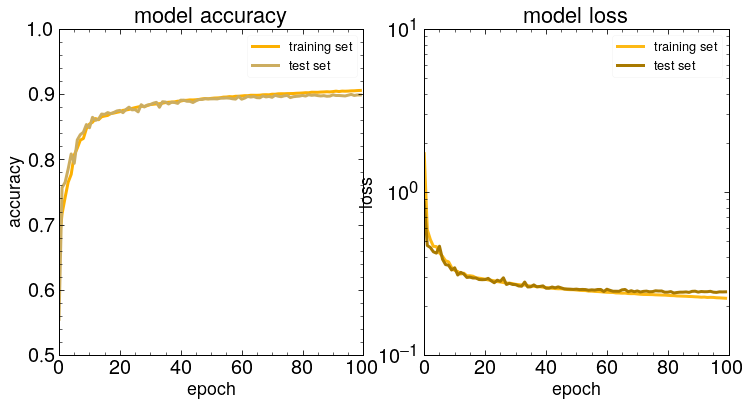

In [25]:
histplots(hist_g1)

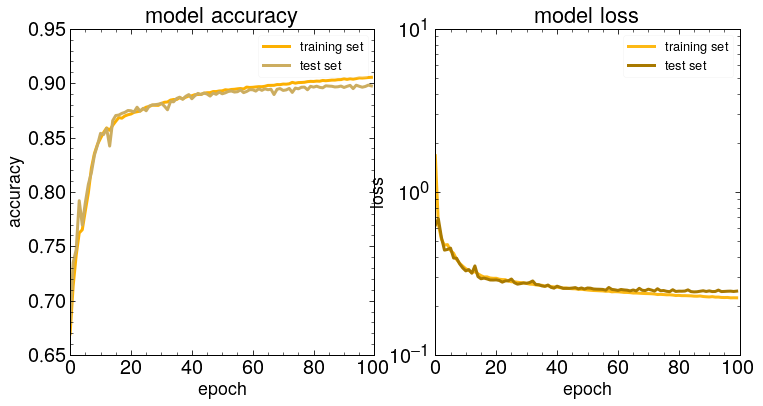

In [26]:
histplots(hist_g2)

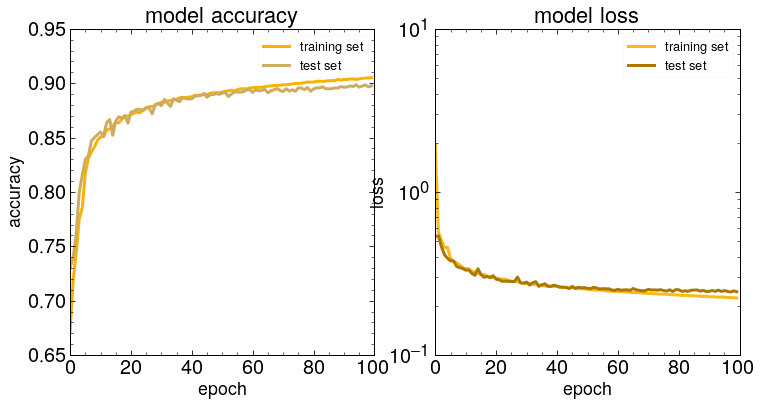

In [27]:
histplots(hist_g3)

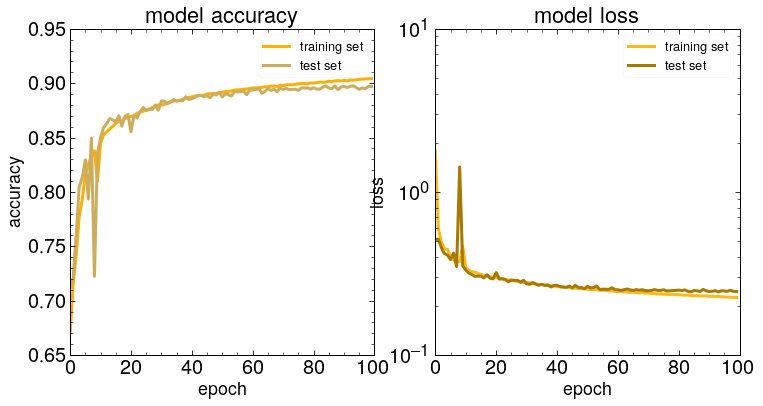

In [28]:
histplots(hist_g4)

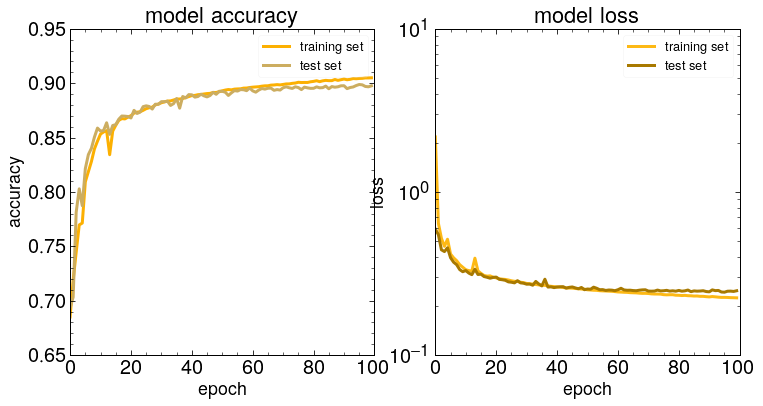

In [29]:
histplots(hist_g5)

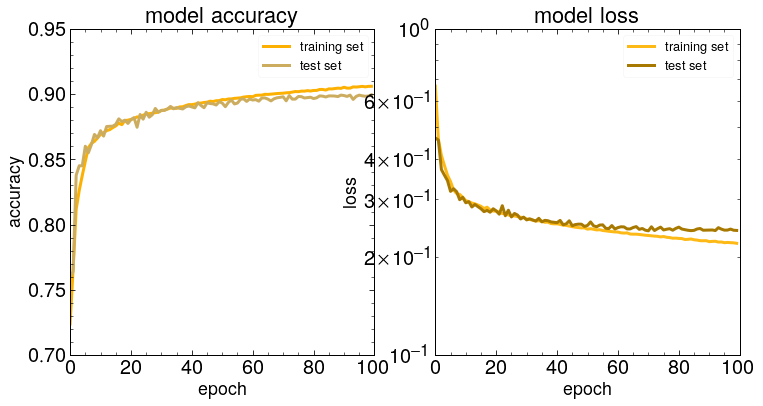

In [30]:
histplots(hist_s1)

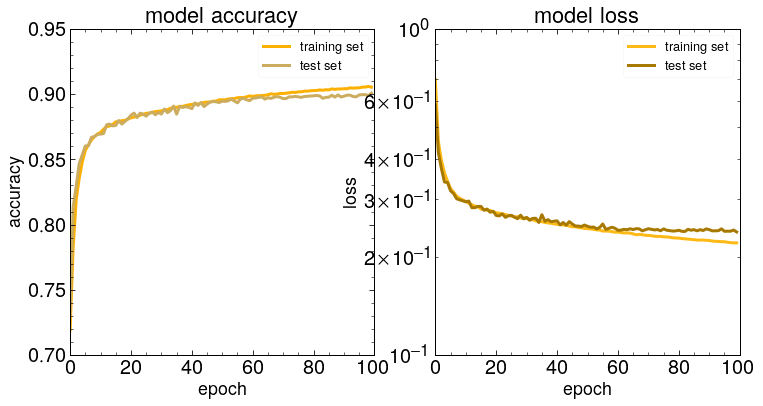

In [31]:
histplots(hist_s2)

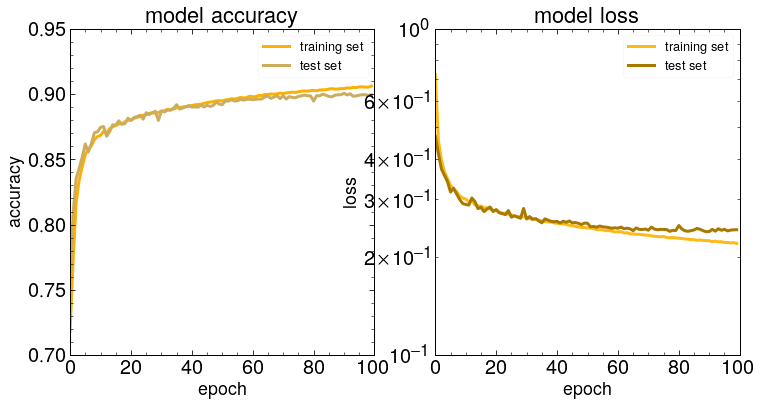

In [32]:
histplots(hist_s3)

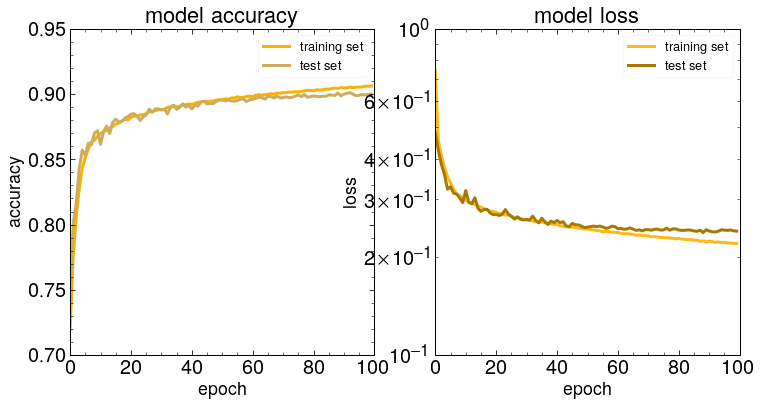

In [33]:
histplots(hist_s4)

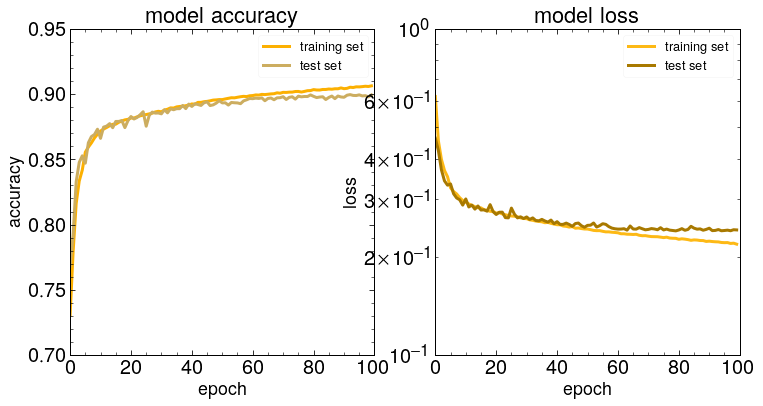

In [34]:
histplots(hist_s5)

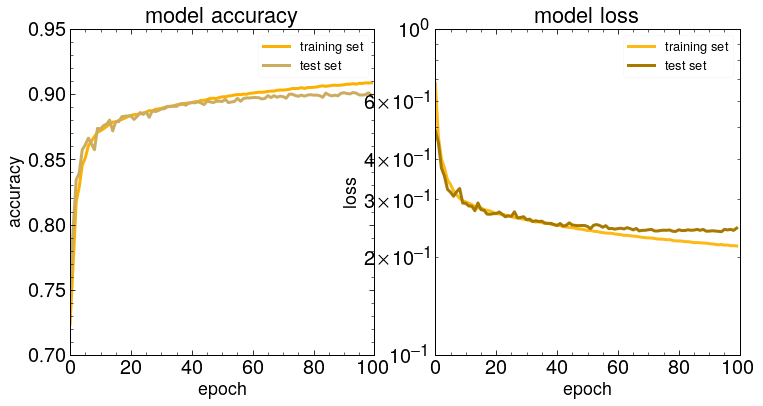

In [35]:
histplots(hist_gs1) #global seed overfits more?? or just global overfits more?

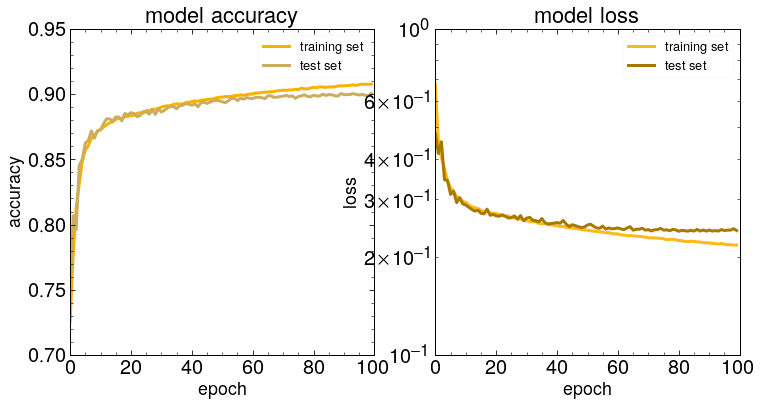

In [36]:
histplots(hist_gs2)

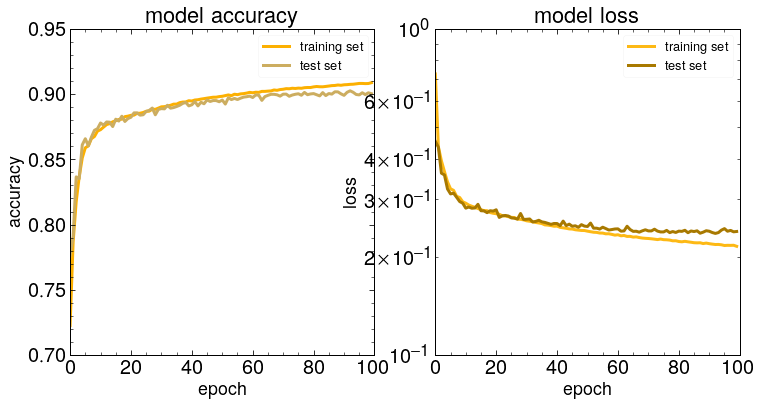

In [15]:
histplots(hist_gs3)

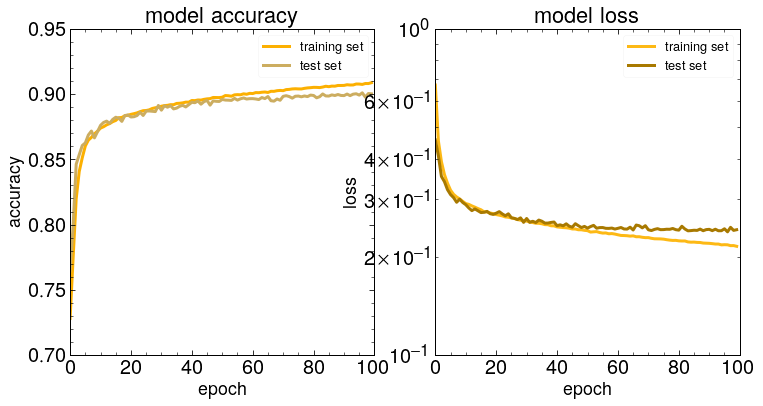

In [16]:
histplots(hist_gs4)

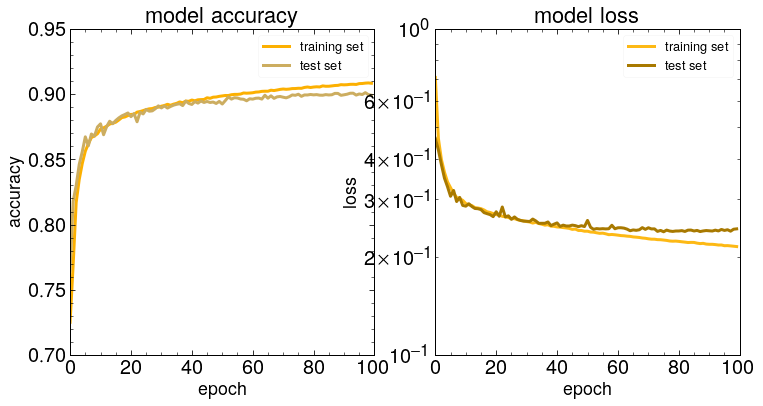

In [17]:
histplots(hist_gs5)